In [1]:
from epi_model import *

In [2]:
from simulation_helper import *

In [3]:
from simulation_manager import simulation_manager

In [4]:
from frozendict import frozendict as fzd

In [5]:
dfs, modelsets = {},{}

In [6]:
names = [
    'HS1-alpha',
    'HS2-alpha',
]

In [7]:
names_print = {
    'HS1-alpha':'HS-1',
    'HS2-alpha':'HS-2',
}

In [8]:
for name in names:
    
    print(f'loading {name}')

    sim_m = simulation_manager()
    sim_m.load_models(name)

    rows = []
    for k,ms in sim_m.models.items():
        rows.append(sim_m.info(k))

    df = pd.DataFrame.from_records(rows)

    #df.head()
    
    dfs[name] = df
    modelsets[name] = sim_m

loading HS1-alpha
loading HS2-alpha


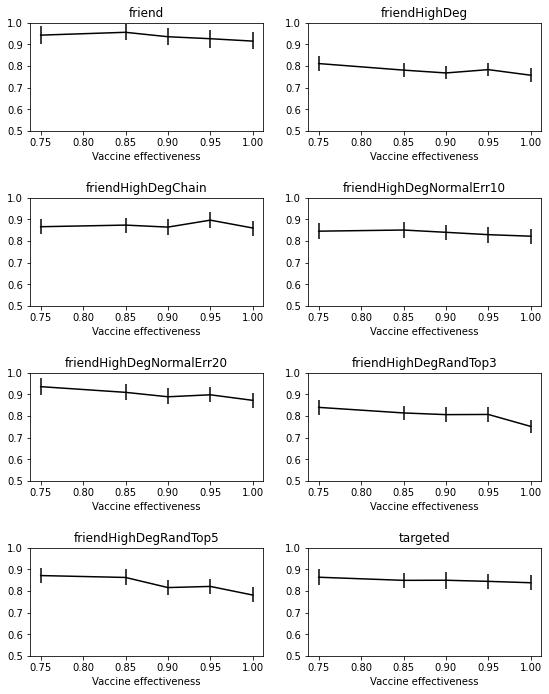

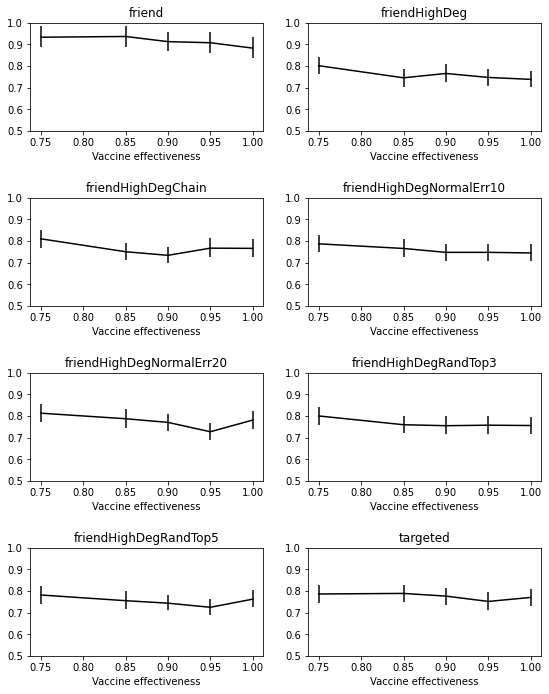

In [14]:
for name in names:
    
    ms = modelsets[name]

    # start by identifying the relevant comparisons
    ks = list(ms.models)
    vas = set()
    comps = []
    for k in ks:
        k = dict(k)
        v = k.pop('vaccinate_alpha')
        k = frozendict(k)
        vas.add( v )
        comps.append(k)

    comps = set(comps)
    comps = [x for x in comps if x['strat'] not in ['none', 'rand']]
    comps = sorted(comps, key=lambda x:tuple(x.values()))
    

    n = len(comps)

    fig = plt.figure(figsize=(8,10))

    for ci,c in enumerate(comps):
        plt.subplot(4,2,ci+1)

        xs = []
        vs = []
        errs = []

        # get the vs
        for v in sorted(vas):
            k = frozendict(c, vaccinate_alpha=v)
            info = ms.info(k)
            xs.append( (0.5-v)/0.5 )
            vs.append( info['P_sus_inf_rel_rand'] )
            errs.append( (lambda x:(x[1]-x[0],x[2]-x[1]))(info['P_sus_inf_rel_rand_BS']) )
            
        errs = np.array(errs).T
            
        plt.errorbar(xs, vs, yerr=errs, color='black')

        plt.xlabel('Vaccine effectiveness')
        plt.title(c['strat'])
        plt.ylim(0.5, 1)

    #fig.suptitle(names_print[name])
    fig.tight_layout(pad=2.0)
    plt.savefig(f'figures/alpha.{names_print[name]}.png')
    plt.show()